In [90]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',False)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import recall_score, precision_score, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")

In [3]:
df_flights = pd.read_csv('cleaned_flights_300000sample1.csv')

Let's trying turning arr_delay to a logistic model

In [4]:
df_flights['arr_delay2'] = np.where(df_flights['arr_delay'] > 0, 1,
                    np.where(df_flights['arr_delay'] <= 0, 0,0))

In [58]:
df_flights

,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,arr_delay2,crs_dep_bin_Afternoon,crs_dep_bin_Evening,crs_dep_bin_Morning,crs_dep_bin_Night,crs_arr_bin_Afternoon,crs_arr_bin_Evening,crs_arr_bin_Morning,crs_arr_bin_Night
0,20,21,72.0,243.0,6,1,0.0,0.4,10,8,1,0,0,0,1,0,0,0,1
1,8,9,71.0,282.0,7,1,0.0,6.5,9,18,1,1,0,0,0,1,0,0,0
2,7,9,154.0,773.0,10,4,0.0,0.1,10,8,1,1,0,0,0,1,0,0,0
3,22,0,156.0,815.0,10,0,0.0,0.7,8,5,1,0,0,0,1,0,0,1,0
4,6,10,318.0,1990.0,10,5,0.0,0.1,10,14,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288587,7,7,115.0,411.0,4,3,0.0,3.3,10,7,0,1,0,0,0,1,0,0,0
288588,6,8,127.0,585.0,3,5,0.0,21.7,9,20,1,1,0,0,0,1,0,0,0
288589,6,10,227.0,1249.0,1,0,0.1,0.2,9,30,1,1,0,0,0,1,0,0,0
288590,15,18,120.0,755.0,1,2,0.0,0.0,10,10,0,0,1,0,0,0,0,0,1


In [6]:
one_hot = pd.get_dummies(df_flights[['crs_dep_bin','crs_arr_bin']])
df_flights = pd.concat([df_flights,one_hot],axis=1)

In [7]:
df_flights = df_flights.drop(['op_unique_carrier','origin','dest','origin','dest','fl_date','date_time','location','crs_dep_bin','crs_arr_bin','arr_delay'],axis=1)

In [59]:
df_flights.head()

,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,arr_delay2,crs_dep_bin_Afternoon,crs_dep_bin_Evening,crs_dep_bin_Morning,crs_dep_bin_Night,crs_arr_bin_Afternoon,crs_arr_bin_Evening,crs_arr_bin_Morning,crs_arr_bin_Night
0,20,21,72.0,243.0,6,1,0.0,0.4,10,8,1,0,0,0,1,0,0,0,1
1,8,9,71.0,282.0,7,1,0.0,6.5,9,18,1,1,0,0,0,1,0,0,0
2,7,9,154.0,773.0,10,4,0.0,0.1,10,8,1,1,0,0,0,1,0,0,0
3,22,0,156.0,815.0,10,0,0.0,0.7,8,5,1,0,0,0,1,0,0,1,0
4,6,10,318.0,1990.0,10,5,0.0,0.1,10,14,0,1,0,0,0,1,0,0,0


In [9]:
df_flights['arr_delay2'].value_counts()

0    192096
1     96496
Name: arr_delay2, dtype: int64

In [10]:
X = df_flights.drop(['arr_delay2'],axis=1)
y = df_flights['arr_delay2']

In [11]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.3)

In [13]:
print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_test :{X_test.shape}')
print(f'Shape of y_train :{y_train.shape}')
print(f'Shape of y_test :{y_test.shape}')

Shape of X_train :(202014, 18)
Shape of X_test :(86578, 18)
Shape of y_train :(202014,)
Shape of y_test :(86578,)


In [14]:
lr = LogisticRegression(multi_class='multinomial')

In [15]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [16]:
y_pred = lr.predict(X_test)

In [17]:
cnf_matrix = confusion_matrix(y_test,y_pred)

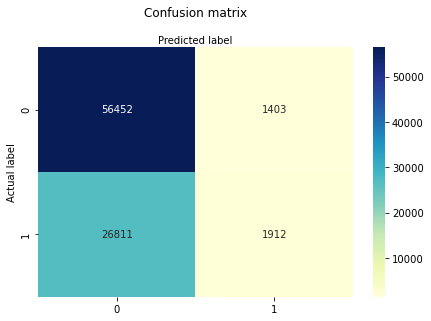

In [18]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.6741204463027559
Precision: 0.6273842380888022
Recall: 0.5211582909591418
F1: 0.45971314511940087
              precision    recall  f1-score   support

           0       0.68      0.98      0.80     57855
           1       0.58      0.07      0.12     28723

    accuracy                           0.67     86578
   macro avg       0.63      0.52      0.46     86578
weighted avg       0.64      0.67      0.57     86578



In [20]:
cnf_matrix

array([[56452,  1403],
       [26811,  1912]], dtype=int64)

In [52]:
len(df_flights[df_flights['arr_delay2']==1])/len(df_flights)

0.3451042025344075

In [22]:
y_pred_proba = lr.predict_proba(X_test)

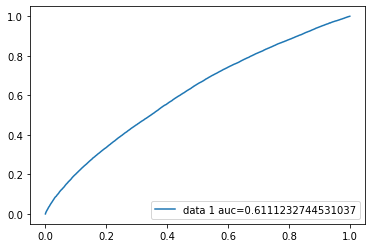

In [47]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr,label='data 1 auc='+str(auc))
plt.legend(loc=4)
plt.show()

### some new data

In [24]:
df_flights2 = pd.read_csv('cleaned_flights_sample2.csv')

In [30]:
df_flights2.head()

,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity,arr_delay2
0,20,21,72.0,243.0,0.0,0.4,10,8,39.0,0.77,1
1,8,9,71.0,282.0,0.0,6.5,9,18,55.0,0.71,1
2,7,9,154.0,773.0,0.0,0.1,10,8,41.0,0.81,1
3,22,0,156.0,815.0,0.0,0.7,8,5,53.0,0.77,1
4,6,10,318.0,1990.0,0.0,0.1,10,14,160.0,0.89,0


In [26]:
df_flights2['arr_delay2'] = np.where(df_flights2['arr_delay'] > 0, 1,
                    np.where(df_flights2['arr_delay'] <= 0, 0,0))

In [28]:
# Trying with no bins as they dont seem to have much importance from above.
df_flights2 = df_flights2.drop(['fl_date','op_unique_carrier','origin','dest','crs_dep_bin','crs_arr_bin','departures_performed','payload','seats','passengers','freight','mail','ramp_to_ramp'],axis=1)

In [29]:
df_flights2 = df_flights2.drop(['month','weekday','arr_delay'],axis=1)

In [31]:
X2 = df_flights2.drop(['arr_delay2'],axis=1)
y2= df_flights2['arr_delay2']

In [32]:
scaler = StandardScaler()
X_scale2 = scaler.fit_transform(X2)
X_scale2 = pd.DataFrame(X_scale2,columns=X2.columns)

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale2,y2,test_size=0.3)

In [42]:
lr2 = LogisticRegression(multi_class='multinomial')

In [43]:
lr2.fit(X_train2,y_train2)

In [44]:
y_pred2 = lr2.predict(X_test2)

In [45]:
cnf_matrix2 = confusion_matrix(y_test2,y_pred2)

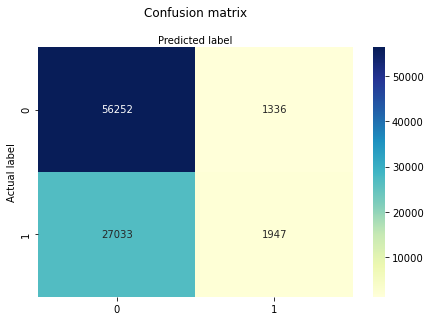

In [46]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2,average='macro'))
print("Recall:",metrics.recall_score(y_test2, y_pred2,average='macro'))
print("F1:",metrics.f1_score(y_test2, y_pred2,average='macro'))
print(metrics.classification_report(y_test2,y_pred2))

Accuracy: 0.6722923020053599
Precision: 0.6342354368153085
Recall: 0.5219924936915342
F1: 0.45965778361534476
              precision    recall  f1-score   support

           0       0.68      0.98      0.80     57588
           1       0.59      0.07      0.12     28980

    accuracy                           0.67     86568
   macro avg       0.63      0.52      0.46     86568
weighted avg       0.65      0.67      0.57     86568



In [48]:
y_pred_proba2 = lr2.predict_proba(X_test2)

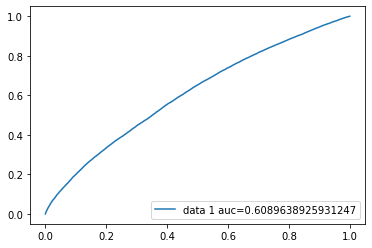

In [49]:
fpr, tpr, _ = metrics.roc_curve(y_test2,y_pred_proba2[:,1])
auc = metrics.roc_auc_score(y_test2,y_pred_proba2[:,1])
plt.plot(fpr,tpr,label='data 1 auc='+str(auc))
plt.legend(loc=4)
plt.show()

print out classification report along with other metrics
run another log model with new data

Try with > 10 minutes as delay

In [52]:
df_flights3 = pd.read_csv('cleaned_flights_sample2.csv')

In [54]:
df_flights3['arr_delay2'] = np.where(df_flights3['arr_delay'] > 10, 1,
                    np.where(df_flights3['arr_delay'] <= 10, 0,0))

In [79]:
df_flights3

,op_unique_carrier,origin,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity,arr_delay2
0,18,102,20,21,106.0,72.0,243.0,6,1,0.0,0.4,10,8,39.0,0.77,1
1,23,94,8,9,46.0,71.0,282.0,7,1,0.0,6.5,9,18,55.0,0.71,1
2,25,309,7,9,19.0,154.0,773.0,10,4,0.0,0.1,10,8,41.0,0.81,1
3,17,73,22,0,8.0,156.0,815.0,10,0,0.0,0.7,8,5,53.0,0.77,0
4,7,183,6,10,-25.0,318.0,1990.0,10,5,0.0,0.1,10,14,160.0,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288553,18,311,7,7,-8.0,115.0,411.0,4,3,0.0,3.3,10,7,43.0,0.85,0
288554,9,353,6,8,4.0,127.0,585.0,3,5,0.0,21.7,9,20,42.0,0.84,0
288555,16,46,6,10,19.0,227.0,1249.0,1,0,0.1,0.2,9,30,119.0,0.66,1
288556,22,89,15,18,-16.0,120.0,755.0,1,2,0.0,0.0,10,10,122.0,0.75,0


In [65]:
le = LabelEncoder()

In [66]:
df_flights3['op_unique_carrier'] = le.fit_transform(df_flights3['op_unique_carrier'])
df_flights3['origin'] = le.fit_transform(df_flights3['origin'])

In [68]:
df_flights3 = df_flights3.drop(['fl_date','crs_dep_bin','dest','crs_arr_bin','departures_performed','payload','seats','passengers','freight','mail','ramp_to_ramp'],axis=1)

In [80]:
df_flights3 = df_flights3.drop(['arr_delay'],axis=1)

In [69]:
df_flights3

,op_unique_carrier,origin,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity,arr_delay2
0,18,102,20,21,106.0,72.0,243.0,6,1,0.0,0.4,10,8,39.0,0.77,1
1,23,94,8,9,46.0,71.0,282.0,7,1,0.0,6.5,9,18,55.0,0.71,1
2,25,309,7,9,19.0,154.0,773.0,10,4,0.0,0.1,10,8,41.0,0.81,1
3,17,73,22,0,8.0,156.0,815.0,10,0,0.0,0.7,8,5,53.0,0.77,0
4,7,183,6,10,-25.0,318.0,1990.0,10,5,0.0,0.1,10,14,160.0,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288553,18,311,7,7,-8.0,115.0,411.0,4,3,0.0,3.3,10,7,43.0,0.85,0
288554,9,353,6,8,4.0,127.0,585.0,3,5,0.0,21.7,9,20,42.0,0.84,0
288555,16,46,6,10,19.0,227.0,1249.0,1,0,0.1,0.2,9,30,119.0,0.66,1
288556,22,89,15,18,-16.0,120.0,755.0,1,2,0.0,0.0,10,10,122.0,0.75,0


In [81]:
X3 = df_flights3.drop(['arr_delay2'],axis=1)
y3 = df_flights3['arr_delay2']

In [82]:
scaler = StandardScaler()
X_scale3 = scaler.fit_transform(X3)
X_scale3 = pd.DataFrame(X_scale3,columns=X3.columns)

In [83]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scale3,y3,test_size=0.3)

In [84]:
lr3 = LogisticRegression(multi_class='multinomial')

In [85]:
lr3.fit(X_train3,y_train3)

LogisticRegression(multi_class='multinomial')

In [86]:
y_pred3 = lr3.predict(X_test3)

In [87]:
cnf_matrix3 = confusion_matrix(y_test3,y_pred3)

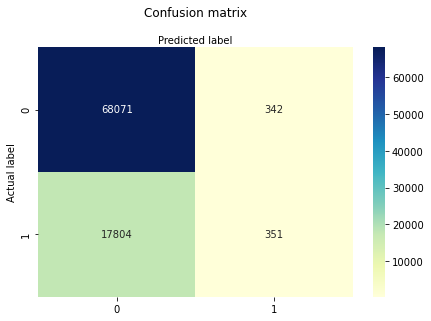

In [88]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))
print("Precision:",metrics.precision_score(y_test3, y_pred3,average='macro'))
print("Recall:",metrics.recall_score(y_test3, y_pred3,average='macro'))
print("F1:",metrics.f1_score(y_test3, y_pred3,average='macro'))
print(metrics.classification_report(y_test3,y_pred3))

Accuracy: 0.7903844376674983
Precision: 0.6495844533923136
Recall: 0.5071672335246519
F1: 0.4598170552475498
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     68413
           1       0.51      0.02      0.04     18155

    accuracy                           0.79     86568
   macro avg       0.65      0.51      0.46     86568
weighted avg       0.73      0.79      0.71     86568



### SMOTE

In [93]:
from imblearn.over_sampling import SMOTE

In [95]:
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_flights3.drop(['arr_delay2'],axis=1), df_flights3['arr_delay2'])

In [97]:
y

0         1
1         1
2         1
3         0
4         0
         ..
456485    1
456486    1
456487    1
456488    1
456489    1
Name: arr_delay2, Length: 456490, dtype: int32

In [127]:
X = df_flights3.drop(['arr_delay2'],axis=1)
y = df_flights3['arr_delay2']

In [128]:
print(len(X))
print(len(y))

288558
288558


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [131]:
#Create an oversampled training data
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [132]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [133]:
y_pred = lr.predict(X_test)

In [134]:
cnf_matrix = confusion_matrix(y_test,y_pred)

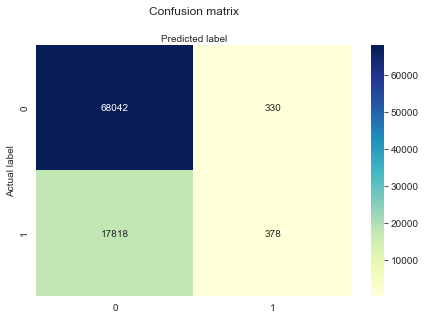

In [135]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [136]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7903613344422882
Precision: 0.6631872145037052
Recall: 0.5079736296299078
F1: 0.46116232237327026
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     68372
           1       0.53      0.02      0.04     18196

    accuracy                           0.79     86568
   macro avg       0.66      0.51      0.46     86568
weighted avg       0.74      0.79      0.71     86568



In [137]:
lr_o = LogisticRegression(multi_class='multinomial')
lr_o.fit(X_oversample, y_oversample)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [138]:
y_pred_o = lr_o.predict(X_test)

In [139]:
cnf_matrix_o = confusion_matrix(y_test,y_pred_o)

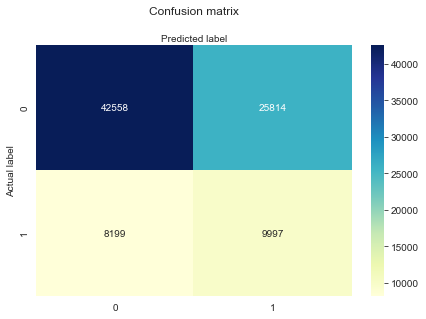

In [140]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_o), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [141]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_o))
print("Precision:",metrics.precision_score(y_test, y_pred_o,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred_o,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred_o,average='macro'))
print(metrics.classification_report(y_test,y_pred_o))

Accuracy: 0.6070950004620645
Precision: 0.5588128324913182
Recall: 0.5859271243010689
F1: 0.5423486231477224
              precision    recall  f1-score   support

           0       0.84      0.62      0.71     68372
           1       0.28      0.55      0.37     18196

    accuracy                           0.61     86568
   macro avg       0.56      0.59      0.54     86568
weighted avg       0.72      0.61      0.64     86568

